In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad, solve_ivp

#### Sistemas massas-mola-amortecedor com fonte

$$m \ddot{x} + c\dot{x} + kx = 1000sen(2t)$$

Reduzindo a ordem

\begin{equation}
\left\{\begin{matrix}
v = \dot{x} \\ 
\dot{v} = \ddot{x}
\end{matrix}\right.
\end{equation}



Logo, temos

\begin{equation}
\left\{\begin{matrix}
v = \dot{x} \\ 
\dot{v} = (- c\dot{x} - kx + 1000sen(2t))/m
\end{matrix}\right.
\end{equation}

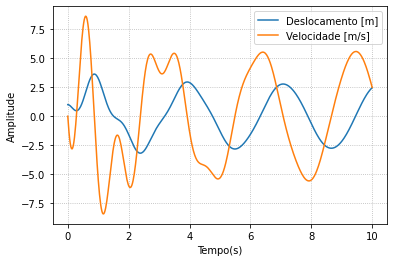

In [5]:
m=10
k=400
c=10

def dsdt(t, S):
    x, v = S
    return [v, (-k*x - c*v + 1000*np.sin(2*t))/m] #posição, velocidade

t = np.linspace(0, 10, 500)
S0 = (1, 0)
sol = solve_ivp(dsdt, t_span=(0, 10), y0=S0, t_eval=t)

fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='Amplitude')
ax.plot(sol.t, sol.y[0], label='Deslocamento [m]')
ax.plot(sol.t, sol.y[1], label='Velocidade [m/s]')

ax.legend()
ax.grid(ls='dotted')

### Exercício - Sistema de equações

\begin{equation}
\left\{\begin{matrix}
m_1 \ddot{x}_1 - c\dot{x}_2 + c\dot{x}_1 + (k_1 + k_2){x}_1 - k_2{x}_2 = u(t) \\ 
m_2 \ddot{x}_2 - c\dot{x}_1 + c\dot{x}_2 + (k_2 + k_3){x}_2 - k_2{x}_1 = 0
\end{matrix}\right.
\end{equation}


Substituição das variáveis

\begin{equation}
\left\{\begin{matrix}
v_1 = \dot{x}_1 \\ 
\dot{v}_1 = \ddot{x}_1
\end{matrix}\right.
\end{equation}

\begin{equation}
\left\{\begin{matrix}
v_1 = \dot{x}_2 \\ 
\dot{v}_1 = \ddot{x}_2
\end{matrix}\right.
\end{equation}

\begin{equation}
\left\{\begin{matrix}
m_1 \dot{v}_1 - cv_2 + cv_1 + (k_1 + k_2){x}_1 - k_2{x}_2 = u(t) \\ 
m_2 \dot{v}_2 - cv_1 + cv_2 + (k_2 + k_3){x}_2 - k_2{x}_1 = 0
\end{matrix}\right.
\end{equation}

Assim, temos o sistema

\begin{bmatrix}
v_1 \\
\dot{v}_1 \\
v_2 \\
\dot{v}_2 \\
\end{bmatrix}=

\begin{bmatrix}
\dot{x}_1 \\
(cv_2 - cv_1 - (k_1 + k_2){x}_1 + k_2{x}_2 + u(t))/m_1 \\ 
\dot{x}_2 \\
(cv_1 - cv_2 - (k_2 + k_3){x}_2 + k_2{x}_1)/m_2
\end{bmatrix}

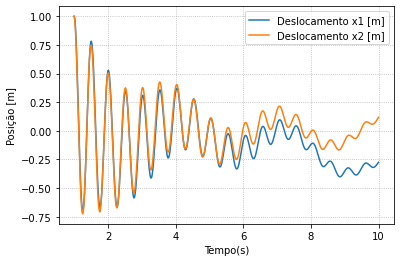

In [6]:
m1=50
m2=2
k1=100
k2=4000
k3=100
c=10000

def u(t):    
    return 1000*np.sin(2*t)

def dsdt(t, S):
    x1, v1, x2, v2 = S 
    return [v1, 
           (c*v2 - c*v1 + (k1+k2)*x1 - k2*x2 + u(t))/m1,
           v2,
           (c*v1 - c*v2 - (k1+k2)*x2 - k2*x1)/m2]

t = np.linspace(1, 10, 500)
S0 = (1, 0, 1, 0)
sol = solve_ivp(dsdt, t_span=(1, 10), y0=S0, t_eval=t)

fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='Posição [m]')
ax.plot(sol.t, sol.y[0], label='Deslocamento x1 [m]')
ax.plot(sol.t, sol.y[2], label='Deslocamento x2 [m]')
ax.legend()
ax.grid(ls='dotted')

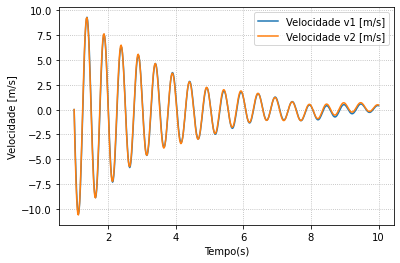

In [7]:
fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='Velocidade [m/s]')
ax.plot(sol.t, sol.y[1], label='Velocidade v1 [m/s]')
ax.plot(sol.t, sol.y[3], label='Velocidade v2 [m/s]')
ax.legend()
ax.grid(ls='dotted')